In [7]:
from field_extractor import extract_book

volumes = {
    'ot':{},
    'nt':{},
    'bm':{},
    'dc':{},
    'pgp':{}
}
for v in volumes:
    meta = extract_book(v, 'meta')
    volumes[v]['word_count'] = meta['word_count']
    volumes[v]['verse_count'] = meta['verse_count']
volumes

{'ot': {'word_count': 609233, 'verse_count': 23145},
 'nt': {'word_count': 180380, 'verse_count': 7957},
 'bm': {'word_count': 266923, 'verse_count': 6604},
 'dc': {'word_count': 111814, 'verse_count': 3654},
 'pgp': {'word_count': 26346, 'verse_count': 635}}

In [8]:
from get_word import get_word
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

gospel_words = [
    'faith','repentance','baptize','baptism',
    'holy','ghost','spirit','endure',
    'covenant','ordinance','promise',
    'gospel','doctrine',
    'god','lord','christ','jesus','father',
    'family','love','charity'
]

for v in volumes:
    for term in gospel_words:
        count = get_word(v, stemmer.stem(term))
        if term == 'baptism':
            count += volumes[v]['baptize']
        volumes[v][term] = count
    del volumes[v]['baptize']
volumes

{'ot': {'word_count': 609233,
  'verse_count': 23145,
  'faith': 56,
  'repentance': 42,
  'baptism': 0,
  'holy': 460,
  'ghost': 11,
  'spirit': 258,
  'endure': 19,
  'covenant': 274,
  'ordinance': 48,
  'promise': 43,
  'gospel': 0,
  'doctrine': 6,
  'god': 3334,
  'lord': 7272,
  'christ': 0,
  'jesus': 0,
  'father': 1247,
  'family': 296,
  'love': 195,
  'charity': 0},
 'nt': {'word_count': 180380,
  'verse_count': 7957,
  'faith': 300,
  'repentance': 64,
  'baptism': 97,
  'holy': 194,
  'ghost': 98,
  'spirit': 293,
  'endure': 21,
  'covenant': 25,
  'ordinance': 9,
  'promise': 72,
  'gospel': 104,
  'doctrine': 50,
  'god': 1379,
  'lord': 734,
  'christ': 573,
  'jesus': 983,
  'father': 428,
  'family': 1,
  'love': 223,
  'charity': 28},
 'bm': {'word_count': 266923,
  'verse_count': 6604,
  'faith': 299,
  'repentance': 338,
  'baptism': 144,
  'holy': 305,
  'ghost': 97,
  'spirit': 293,
  'endure': 15,
  'covenant': 152,
  'ordinance': 11,
  'promise': 93,
  'gosp

In [9]:
import pandas as pd

for_df = []
for vol, item in volumes.items():
    word_count = item['word_count']
    verse_count = item['verse_count']
    for word, count in item.items():
        if word not in ('word_count','verse_count'):
            w = {}
            w['word'] = word
            w['occurrences'] = count
            w['times_per_word'] = count / word_count
            w['times_per_verse'] = count / verse_count
            w['volume'] = vol
            for_df.append(w)
df = pd.DataFrame(for_df)
df

,occurances,times_per_verse,times_per_word,volume,word
0,56,0.002420,0.000092,ot,faith
1,42,0.001815,0.000069,ot,repentance
2,0,0.000000,0.000000,ot,baptism
3,460,0.019875,0.000755,ot,holy
4,11,0.000475,0.000018,ot,ghost
5,258,0.011147,0.000423,ot,spirit
6,19,0.000821,0.000031,ot,endure
7,274,0.011838,0.000450,ot,covenant
8,48,0.002074,0.000079,ot,ordinance
9,43,0.001858,0.000071,ot,promise


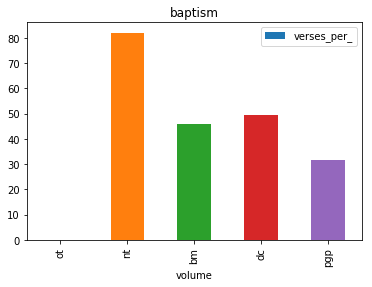

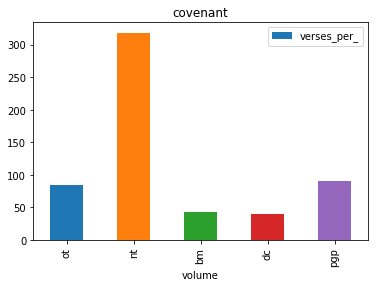

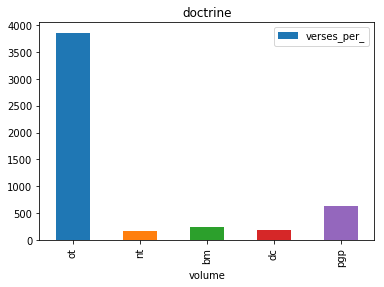

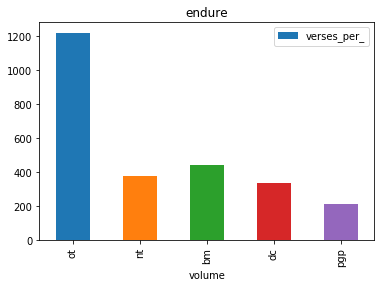

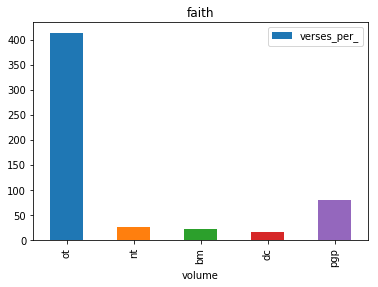

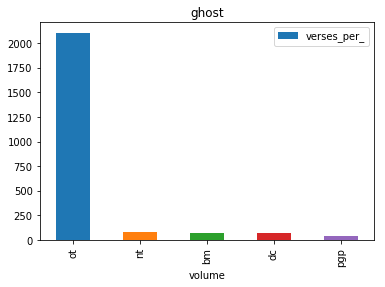

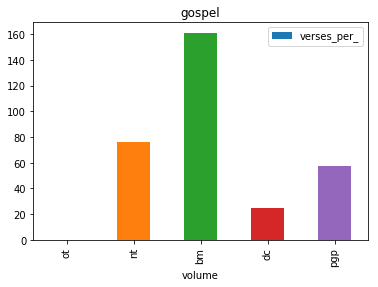

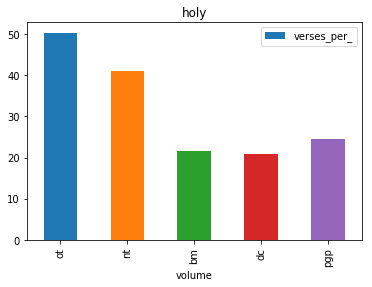

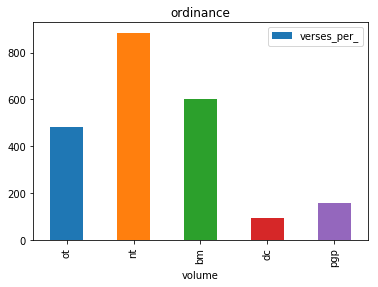

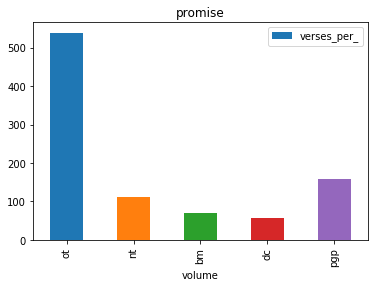

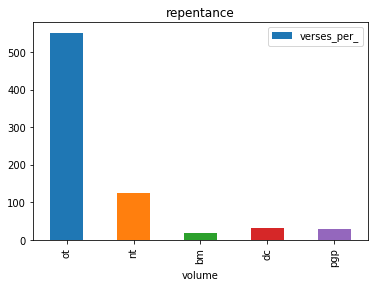

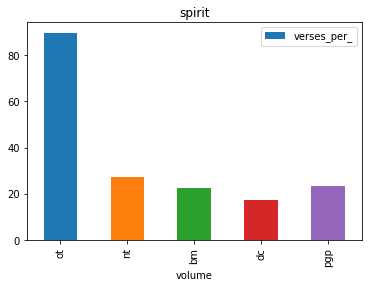

In [6]:
import matplotlib.pyplot as plt

for word, group in df.groupby('word'):
    group.plot.bar(x='volume',y='verses_per_', title=word)
plt.show()

In [4]:
import pandas as pd

df = pd.DataFrame.from_dict(volumes, 'index')
df

,word_count,verse_count,faith,repentance,baptism,baptize,holy,ghost,spirit,endure,covenant,ordinance,promise,gospel,doctrine
bm,266923,6604,299,338,25,119,305,97,293,15,152,11,93,41,28
dc,111814,3654,224,114,31,43,175,50,213,11,92,39,64,148,19
nt,180380,7957,300,64,23,74,194,98,293,21,25,9,72,104,50
ot,609233,23145,56,42,0,0,460,11,258,19,274,48,43,0,6
pgp,26346,635,8,21,3,17,26,15,27,3,7,4,4,11,1


In [5]:
for term in gospel_words:
    df[term + '_per_word'] = df[term] / df['word_count']
    df[term + '_per_verse'] = df[term] / df['verse_count']
df

,word_count,verse_count,faith,repentance,baptism,baptize,holy,ghost,spirit,endure,...,covenant_per_word,covenant_per_verse,ordinance_per_word,ordinance_per_verse,promise_per_word,promise_per_verse,gospel_per_word,gospel_per_verse,doctrine_per_word,doctrine_per_verse
bm,266923,6604,299,338,25,119,305,97,293,15,...,0.000569,0.023016,0.000041,0.001666,0.000348,0.014082,0.000154,0.006208,0.000105,0.004240
dc,111814,3654,224,114,31,43,175,50,213,11,...,0.000823,0.025178,0.000349,0.010673,0.000572,0.017515,0.001324,0.040504,0.000170,0.005200
nt,180380,7957,300,64,23,74,194,98,293,21,...,0.000139,0.003142,0.000050,0.001131,0.000399,0.009049,0.000577,0.013070,0.000277,0.006284
ot,609233,23145,56,42,0,0,460,11,258,19,...,0.000450,0.011838,0.000079,0.002074,0.000071,0.001858,0.000000,0.000000,0.000010,0.000259
pgp,26346,635,8,21,3,17,26,15,27,3,...,0.000266,0.011024,0.000152,0.006299,0.000152,0.006299,0.000418,0.017323,0.000038,0.001575


5


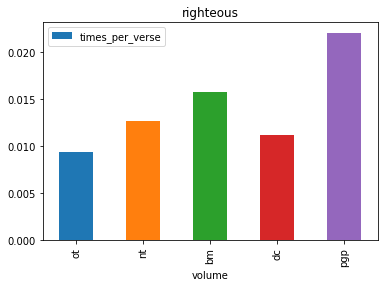

In [29]:
plot_word_comparison(df, 'righteous')

In [26]:
import matplotlib.pyplot as plt
from volume_access import extend_df
def plot_word_comparison(df, word, by_verse=True):
    if by_verse:
        y = 'times_per_verse'
    else:
        y = 'times_per_word'
    if len(df[df.word == word]) == 0:
        df = extend_df(df, word)
    print(len(df[df.word == word]))
    df[df.word == word].plot.bar(x='volume',y=y, title=word)
    plt.show()

In [24]:
df

,occurances,times_per_verse,times_per_word,volume,word
0,56,0.002420,0.000092,ot,faith
1,42,0.001815,0.000069,ot,repentance
2,0,0.000000,0.000000,ot,baptism
3,460,0.019875,0.000755,ot,holy
4,11,0.000475,0.000018,ot,ghost
5,258,0.011147,0.000423,ot,spirit
6,19,0.000821,0.000031,ot,endure
7,274,0.011838,0.000450,ot,covenant
8,48,0.002074,0.000079,ot,ordinance
9,43,0.001858,0.000071,ot,promise
